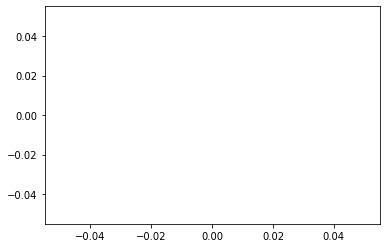

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
from IPython.display import display, Markdown, Latex
import pickle

SMALL_SIZE = 14
MEDIUM_SIZE = 16
LARGE_SIZE = 18
HUGE_SIZE = 20

plt.plot()

plt.rcdefaults()
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = MEDIUM_SIZE
plt.rcParams['axes.titlesize'] = LARGE_SIZE
plt.rcParams['axes.labelsize'] = MEDIUM_SIZE
plt.rcParams['xtick.labelsize'] = MEDIUM_SIZE
plt.rcParams['ytick.labelsize'] = MEDIUM_SIZE
plt.rcParams['legend.fontsize'] = MEDIUM_SIZE
plt.rcParams['figure.titlesize'] = LARGE_SIZE
plt.rcParams['figure.figsize'] = [7.2, 7.2]
plt.rcParams['figure.dpi'] = 60
plt.rcParams['figure.facecolor'] = (1.0, 1.0, 1.0, 0.0)


from utils import CobbDouglasDeflator, get_random_prob

In [2]:
prob = CobbDouglasDeflator()

In [3]:
display(Latex(prob.general_setup()))

<IPython.core.display.Latex object>

In [4]:
display(Latex(prob.setup()))
prob.sol

<IPython.core.display.Latex object>

{'CPI': 150.0, 'CONST_UTIL_DEFLATOR': 141.4213562373095}

In [5]:
df = pd.read_csv("CobbDouglasConsumer_examples.csv")
params_df = df.groupby(['nx','dx','ny','dy','I','gmax']).agg(
    nprob = ('nx','count')
).reset_index()
params_df = params_df.loc[params_df['nprob']>1].reset_index(drop=True)

examples = []
n_found = 0
for idx, row in params_df.iterrows():
    nx, dx, ny, dy, I, gmax = row['nx'], row['dx'], row['ny'], row['dy'], row['I'], row['gmax']
    sub_df = df.loc[
        (df['nx']==nx) & (df['dx']==dx) & (df['ny']==ny) & (df['dy']==dy) & (df['I']==I) & (df['gmax']==gmax)
    ].sample(2, replace=False).reset_index(drop=True)
    px1 = sub_df.loc[0, 'px']
    py1 = sub_df.loc[0, 'py']
    px2 = sub_df.loc[1, 'px']
    py2 = sub_df.loc[1, 'py']
    params = {'nx':nx,'dx':dx,'ny':ny,'dy':dy,'I':I,'px1':px1,'py1':py1,'px2':px2,'py2':py2,'gmax':gmax}
    prob = CobbDouglasDeflator(params)
    if prob.check_solution():
        n_found+=1
        examples.append( prob.params | prob.sol )
    params = {'nx':nx,'dx':dx,'ny':ny,'dy':dy,'I':I,'px1':px2,'py1':py2,'px2':px1,'py2':py1,'gmax':gmax}
    prob = CobbDouglasDeflator(params)
    if prob.check_solution():
        n_found+=1
        examples.append( prob.params | prob.sol )
    if (n_found%1000==0):
        print(f"{n_found} examples found...")
examples = pd.DataFrame.from_dict(examples)
examples = examples.drop_duplicates()
examples.to_csv("CobbDouglasDeflator_examples.csv", index=False, header=True)
print(f"{len(examples)} examples found.")

1000 examples found...
1180 examples found.


In [27]:
prob = get_random_prob(CobbDouglasDeflator, "CobbDouglasDeflator_examples.csv")
display(Latex(prob.setup()))
print(prob.sol)
print(prob.cb2_cons.params)
print(prob.cb2_cons.sol)

<IPython.core.display.Latex object>

{'CPI': 166.66666666666669, 'CONST_UTIL_DEFLATOR': 99.99999999999999}
{'nx': 1.0, 'dx': 2.0, 'ny': 1.0, 'dy': 2.0, 'I': 1919.9999999999998, 'px': 8.0, 'py': 24.0, 'gmax': 240.0}
{'x': 119.99999999999999, 'y': 39.99999999999999, 'U': 69.28203230275508, 'xmax': 239.99999999999997, 'ymax': 79.99999999999999}


In [29]:
(examples['CPI']==100).sum()

48